## Final Project Submission

Please fill out:
* Student name: Pauline Ndung'u
* Student pace: Full time
* Scheduled project review date/time:  12/03/22
* Instructor name: William Okomba
* Blog post URL:


## Movie Exploratory Data Analysis

As a film production company, breaking into the movie industry can be a challenging and costly endeavor, especially without a clear understanding of what types of movies will be successful at the box office. Producing movies that fail to connect with audiences can lead to significant financial losses and potentially harm a company's reputation. To mitigate these risks and maximize returns on investment, it's essential to analyze box office data to identify trends and patterns in movie genres and themes that resonate with audiences. By understanding what types of movies are currently popular and successful, film production companies can make informed decisions about the types of movies they should produce to establish themselves as successful players in the movie industry.


The data used for this project was pulled from the sources listed below:
* Box Office Mojo: https://www.boxofficemojo.com
* IMDB: https://www.imdb.com/interfaces/
* Rotten Tomatoes: https://www.rottentomatoes.com
* The Movie Database: https://www.themoviedb.org/?language=en-US
* The Numbers: https://www.the-numbers.com/   


The data sources used for this project are all movie-related websites that provide information on movies:

* Box Office Mojo: Box Office Mojo is a website that tracks box office revenue for movies released in theaters. The website provides information on box office earnings, release dates, budget, and other related information.

* IMDb: IMDb is a popular online database of information related to films, television programs, and video games. The website contains information on movies, including cast and crew, plot summaries, reviews, ratings, and other related information.

* Rotten Tomatoes: Rotten Tomatoes is a website that aggregates movie reviews and provides an overall score for each movie based on the percentage of positive reviews from critics. The website also provides audience scores and user reviews.

* The Movie Database: The Movie Database (TMDb) is a community-built movie and TV database. The website provides information on movies, including cast and crew, plot summaries, reviews, ratings, and other related information. TMDb also allows users to contribute to the database by adding information on movies and TV shows.

* The Numbers: The Numbers is a website that provides box office and financial information for movies. The website provides information on box office earnings, budgets, and other financial information related to movies.

The dataset is relevant in finding out what types of films to create, as it provides a wealth of information on past movies, including box office earnings, audience and critic ratings, and genre classifications. By analyzing the data, filmmakers can identify trends in the types of movies that have been successful in the past, and use this information to inform decisions on future movie productions.

Some of the specific properties of this data may include:

* Movie titles: The names of the movies that are included in the dataset.
* Release dates: The dates when the movies were released in theaters or made available to the public.
* Box office earnings: The amount of money that each movie earned at the box office.
* Budgets: The amount of money that was spent to produce each movie.
* Ratings: The ratings that each movie received from audiences and critics.
* Reviews: Written reviews or comments that audiences and critics provided about each movie.
* Genres: The different categories or types of movies, such as action, comedy, drama, or horror.
* Cast and crew: The actors, directors, and other professionals who worked on each movie.
* Production companies: The companies or studios that produced or financed each movie.

Although there is a wealth of additional insights that can be derived from this data, the focus will be on answering these specific questions:
1. Which genres have the most popularity?
2. What are the most profitable genres of movies? 
3. What are the highest rated genres of movies?
4. Should runtime be considered when deciding what types of movies to make?
5. What is the relationship between movie release month and box office success?
6. Which studios are performing well?



## DATA MINING

Import necessary Libraries

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import sqlite3

Establish a connection to the IMDB SQLite database and read in the contents of two tables, movie_basics and movie_ratings, into Pandas DataFrames named movie_basics and movie_ratings, respectively, using SQL queries.

In [2]:
conn = sqlite3.connect('C:/Users/Virginia/Desktop/dsc-phase-1-project-v2-4/zippedData/im.db')
q1 = """ 
SELECT * 
FROM movie_basics
""" 

q2 = """ 
SELECT * 
FROM movie_ratings
""" 
movie_basics = pd.read_sql(q1, conn)
movie_ratings = pd.read_sql(q2, conn)

Read in several compressed CSV and TSV files into Pandas DataFrames named movies_df, movie_budgets_df, movie_gross_df, movie_info_df, and movie_reviews_df, which are located in the 'zippedData' directory. The files read in are 'tmdb.movies.csv.gz', 'tn.movie_budgets.csv.gz', 'bom.movie_gross.csv.gz', 'rt.movie_info.tsv.gz', and 'rt.reviews.tsv.gz'.

In [3]:
movies_df = pd.read_csv("zippedData/tmdb.movies.csv.gz", index_col=0)
movie_budgets_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz", index_col=0)
movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip')
movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', compression='gzip', sep='\t')
movie_reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', compression='gzip', sep='\t', encoding='cp1252')

## DATA CLEANING

Here is a general overview of steps taken to clean the data before drawing conclusions.

* Inspecting the data to obtain information about the dataframes.
* Replacing missing values as necessary
* Dropping duplicated values
* Dropping any unnecessary columns
* Updating columns to a pandas datatype
* Renaming columns according to ease of preference

Movie Basics DataFrame

In [4]:
# preview data
movie_basics.info()
# checks number of missing values
movie_basics.isnull().sum()
# checks for number of duplicates
movie_basics.duplicated().sum()
# drops rows with missing values in the genres column
movie_basics.dropna(subset=['genres'], inplace=True)
# drops 'original_title' and 'primary_title' columns.
movie_basics.drop(columns=['original_title', 'primary_title'], axis=1, inplace=True)
# calculates the median value of the 'runtime_minutes' column and assigns it to 'median_runtime'.
median_runtime = movie_basics['runtime_minutes'].median()
# fills in any missing values in the 'runtime_minutes' column with 'median_runtime'.
movie_basics['runtime_minutes'].fillna(median_runtime, inplace=True)
#  strips any leading whitespace from the 'genres' column.
movie_basics['genres'] = movie_basics['genres'].str.strip()
#converts the 'start_year' column to a Pandas datetime format 
movie_basics['start_year'] = pd.to_datetime(movie_basics['start_year'], format='%Y')
# renames the 'runtime_minutes' column to 'runtime'.
movie_basics = movie_basics.rename(columns={'runtime_minutes': 'runtime' })
# confirm changes
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   movie_id    140736 non-null  object        
 1   start_year  140736 non-null  datetime64[ns]
 2   runtime     140736 non-null  float64       
 3   genres      140736 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Movie Ratings DataFrame

In [5]:
# obtains information about the DataFrame
movie_ratings.info()
# checks for duplicates
movie_ratings.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


0

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Movies DataFrame

In [6]:
# display first 5 rows
movies_df.head()
# overview of the data using the .info()
movies_df.info()
# check how many missing values in each column
movies_df.isnull().sum()
# rename title column 
movies_df = movies_df.rename(columns={'title': 'movie_title' })
# drop original_title, genre-ids, original_language, vote_average and vote_counts columns
movies_df.drop(columns=['original_title', 'genre_ids', 'original_language', 'vote_average', 'vote_count'], inplace=True)
# convert release date column to Panda time series format
movies_df["release_date"] = movies_df["release_date"].apply(pd.to_datetime)
# check how many duplicates
print(movies_df.duplicated().sum())
# drop duplicates
movies_df.drop_duplicates(inplace=True)
# confirm changes by checking overview of the dataframe
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB
1020
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            25497 non-null  int64         
 1   popularity    25497 non-null  floa

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Movie Budgets DataFrame

In [7]:
# display first 5 rows
movie_budgets_df.head()
# overview of the dataset
movie_budgets_df.info()
# rename movie column
movie_budgets_df = movie_budgets_df.rename(columns={'movie': 'movie_title' })
# check for duplicates
print(movie_budgets_df.duplicated().sum()) #This checks for duplicated values
# convert release date column to appropriate panda datatype
movie_budgets_df["release_date"] = movie_budgets_df["release_date"].apply(pd.to_datetime)
# remove dollar sign, replace with comma and convert into correct datatypes
movie_budgets_df["production_budget"] = movie_budgets_df["production_budget"].map(lambda x: float(x.replace(",", "").replace("$", "")))
movie_budgets_df["domestic_gross"] = movie_budgets_df["domestic_gross"].map(lambda x: float(x.replace(",", "").replace("$", "")))
movie_budgets_df["worldwide_gross"] = movie_budgets_df["worldwide_gross"].map(lambda x: float(x.replace(",", "").replace("$", "")))
# check to see if there are any changes made
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB
0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie_title        5782 non-null   object        
 2   production_budget  5782 non-null   float64       
 3   domestic_gross     5782 non-null   float64       
 4   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Movie Gross DataFrame

In [8]:
# displays first 5 rows
movie_gross_df.head()
# overview of the dataset
movie_gross_df.info()
# check for Duplicates
print(movie_gross_df.duplicated().sum()) 
# check for missing values
movie_gross_df.isnull().sum()
# rename title column
movie_gross_df = movie_gross_df.rename(columns={'title': 'movie_title' })
# fill missing values in the studio column with 'Unknown'
movie_gross_df['studio'].fillna('Unknown', inplace=True)
# replace NaN with 0
movie_gross_df['foreign_gross'].fillna(0, inplace=True)
# fill missing values with median
movie_gross_df['foreign_gross'].fillna(movie_gross_df.domestic_gross.median(), inplace=True)
movie_gross_df['domestic_gross'].fillna(movie_gross_df.domestic_gross.median(), inplace=True)
# overview of the dataset to confirm changes
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_title     3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Movie Info DataFrame

In [9]:
# displays first 5 rows
movie_info_df.head()
# overview of the dataset
movie_info_df.info()
movie_info_df.isnull().sum()
# check for duplicated values
print(movie_info_df.duplicated().sum())
# drops  'synopsis', 'rating', 'genre', 'writer', 'theater_date', 'dvd_date', 'director columns
movie_info_df.drop(columns=['synopsis', 'rating', 'genre', 'writer', 'theater_date', 'dvd_date', 'director'], inplace=True)
# drops rows with missing values in the studio column
movie_info_df.dropna(subset=['studio'], inplace=True)
# fill box_office missing valus with 0
movie_info_df['box_office'].fillna(0, inplace=True)
# remove commas and return as float type
movie_info_df['box_office'].str.replace(',', '').astype(float)
# replace string minutes with empty strings
movie_info_df['runtime'].replace('minutes', '', regex=True, inplace=True)
# convert runtime column to float type
movie_info_df['runtime'] = movie_info_df['runtime'].astype('float64')
# fill misiing values with median
movie_info_df['runtime'].fillna(movie_info_df.runtime.median(), inplace=True)
# overview of the dataset, affirm changes
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 1 to 1559
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          494 non-null    int64  
 1   currency    305 n

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Movie Reviews DataFrame

In [10]:
# displays first 5 rows
movie_reviews_df.head()
# overview of the data
movie_reviews_df.info()
# check for null values
print(movie_reviews_df.isnull().sum())
# check for duplicated values
movie_reviews_df.duplicated().sum()
# remove duplicates
movie_reviews_df.drop_duplicates(inplace=True)
# fill missing values in review, rating, critic, publisher columns with 'Unknown'
movie_reviews_df['review'].fillna('Unknown', inplace=True)
movie_reviews_df['rating'].fillna('Unknown', inplace=True)
#movie_reviews_df['critic'].fillna('Unknown', inplace=True)
movie_reviews_df['publisher'].fillna('Unknown', inplace=True)
# drop rows with missing values
movie_reviews_df.dropna(inplace=True)
# convert date to correct datatype
movie_reviews_df['date'] = pd.to_datetime(movie_reviews_df['date'])
# overview of the data for confirmation
movie_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB
id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51710 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          51710 non-null  int64         
 1   review      

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

These lines of code perform various merges on multiple Pandas DataFrames containing information about movies. The resulting 'box_office_df' DataFrame contains combined information from all of the original DataFrames which will be our reference dataframe for investigating and making hypotheses.

In [11]:
# merge movie gross dataframe with movie budgets dataframe
movie_gross_budgets_df = pd.merge(movie_budgets_df, movie_gross_df, on='movie_title')
# merge movie gross_budgets dataframe with movie info dataframe
movie_info_gross_budgets_df = pd.merge(movie_gross_budgets_df, movie_info_df, on='studio')
# merge movie info gross budgets with movies dataframe
merged_movies_info_gross_df = pd.merge(movie_info_gross_budgets_df, movies_df, on='release_date')
# merge movie info gross budgets with movie basics dataframe
merged_basics = pd.merge(merged_movies_info_gross_df, movie_basics, on='runtime')
# merge merged_basics with movie ratings dataframe
box_office_df = pd.merge(merged_basics, movie_ratings, on='movie_id')


In [12]:
box_office_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3185649 entries, 0 to 3185648
Data columns (total 21 columns):
 #   Column             Dtype         
---  ------             -----         
 0   release_date       datetime64[ns]
 1   movie_title_x      object        
 2   production_budget  float64       
 3   domestic_gross_x   float64       
 4   worldwide_gross    float64       
 5   studio             object        
 6   domestic_gross_y   float64       
 7   foreign_gross      object        
 8   year               int64         
 9   id_x               int64         
 10  currency           object        
 11  box_office         object        
 12  runtime            float64       
 13  id_y               int64         
 14  popularity         float64       
 15  movie_title_y      object        
 16  movie_id           object        
 17  start_year         datetime64[ns]
 18  genres             object        
 19  averagerating      float64       
 20  numvotes           int64

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## DATA EXPLORATION

1. Which genres have the most popularity?

The popularity of a movie is an indicator of how much the audience is engaging with the movie and how much attention it is receiving. This can be reflected in factors such as ticket sales, social media mentions, online reviews, and word-of-mouth recommendations.  

Popularity is an important factor to consider when deciding what type of movies to create because it reflects the level of audience interest and engagement with a particular genre or type of film. If a genre is highly popular, it can indicate that there is a large potential audience for that type of film and therefore a higher chance of success at the box office. Additionally, a high level of popularity can also be an indicator of cultural relevance and impact, which can help a movie stand out and attract attention. Ultimately, creating movies that align with popular genres can increase the likelihood of commercial success and positive reception from audiences

Therefore, it is an important factor to consider when evaluating the potential success and impact of a movie.

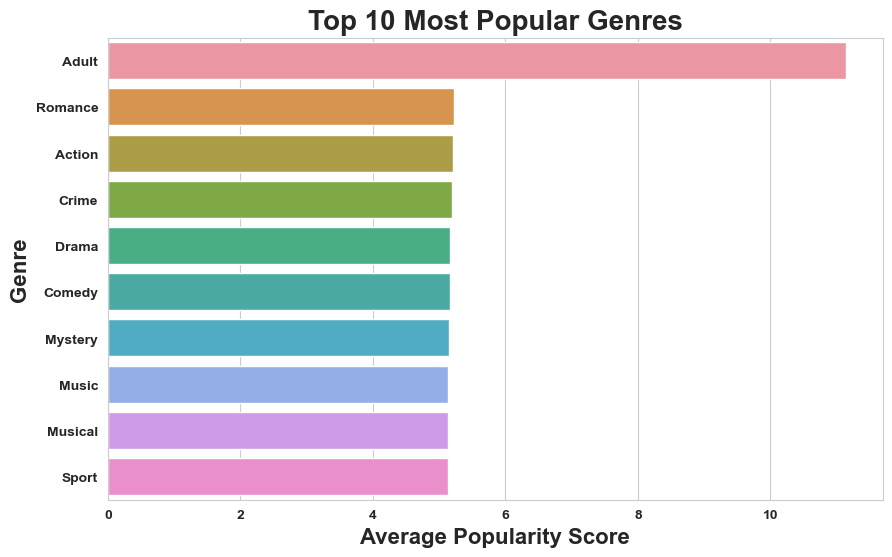

In [13]:
# create a horizontal bar chart showing the average popularity score for each genre.
box_office_df['all_genres'] = box_office_df['genres'].str.split(',')
genre_popularity_df = box_office_df[['popularity', 'all_genres']]

# Separate the genres from the list column and explode them
popularity_df = genre_popularity_df.explode('all_genres')

# Group by genre and calculate the mean popularity score
popularity_by_genre = popularity_df.groupby('all_genres')['popularity'].mean().reset_index()

# Sort the data by popularity score in descending order
popularity_by_genre = popularity_by_genre.sort_values(by='popularity', ascending=False)[:10]

# Create the horizontal bar chart using Seaborn's barplot function
sns.set_palette("flare")
sns.set_style('whitegrid')
# Create a horizontal bar plot of the top 10 most popular genres
plt.figure(figsize=(10, 6)) # set the size of the figure
sns.barplot(x='popularity', y='all_genres', data=popularity_by_genre, )

# Add labels and title
plt.xlabel('Average Popularity Score', fontweight='bold', fontsize=16)
plt.ylabel('Genre', fontweight='bold', fontsize=16)
# Get the x tick labels
xtick_labels = plt.gca().get_xticklabels()
# Set the font weight of each tick label to bold
for label in xtick_labels:
    label.set_weight("bold")
# Get the y tick labels
ytick_labels = plt.gca().get_yticklabels()
# Set the font weight of each tick label to bold
for label in ytick_labels:
    label.set_weight("bold")    
plt.title('Top 10 Most Popular Genres', fontweight='bold', fontsize=20)
plt.savefig('Images/Top 10 most Genre Movies.png')
plt.show() 

In [14]:
# Split the genres column into separate genre categories
box_office_df['genres_list'] = box_office_df['genres'].str.split(',')

# Create a new dataframe with the popularity scores and the list of genres
genre_popularity_df = box_office_df[['popularity', 'genres_list']]

# Explode the list of genres
genre_popularity_df = genre_popularity_df.explode('genres_list')

# Group the dataframe by genre and calculate the mean popularity score
genre_popularity_scores = genre_popularity_df.groupby('genres_list')['popularity'].mean()


# Group the dataframe by genre and calculate the mean, standard deviation, and number of movies for each genre
genre_popularity_stats = genre_popularity_df.groupby('genres_list')['popularity'].agg(['count', 'mean', 'std', 'min', 
                                                                                      lambda x: x.quantile(0.25),
                                                                                      lambda x: x.quantile(0.5),
                                                                                      lambda x: x.quantile(0.75),
                                                                                      'max'])

# Print the resulting popularity statistics for each genre
print(genre_popularity_stats)



               count       mean        std  min  <lambda_0>  <lambda_1>  \
genres_list                                                               
Action        325146   5.214150   6.547987  0.6      0.8400       2.446   
Adult             19  11.140158  14.539225  0.6      1.5975       2.470   
Adventure     180774   5.108425   6.395483  0.6      0.8400       2.355   
Animation      80827   5.005057   6.256393  0.6      0.8180       2.308   
Biography     151250   5.033053   6.299082  0.6      0.8400       2.313   
Comedy        839571   5.161248   6.469740  0.6      0.8400       2.404   
Crime         244004   5.187080   6.522910  0.6      0.8400       2.413   
Documentary   575958   4.933847   6.174956  0.6      0.8050       2.293   
Drama        1481635   5.162120   6.479731  0.6      0.8400       2.397   
Family        146649   5.071590   6.375829  0.6      0.8390       2.314   
Fantasy        94670   5.065506   6.366631  0.6      0.8220       2.313   
History       116785   5.

From the plot, and the calculations, we can see that the Adult genre is the most popular, with an average popularity score of around 11. This is followed by the Romance, Action, Crime and Drama genres  which have an average popularity score of around 5.1.



Overall, the plot suggests that Adult is the most popular genre among moviegoers, followed closely by Romance, Action, Crime, Drama and Comedy.

Some conclusions that can be drawn from the calculations are:

* Drama, Comedy, and Documentary are the most popular genres, with the highest number of movies in each category.
* Action, Adventure, Crime, and Thriller are also popular genres, with a significant number of movies in each category.
* Adult, News, and Western are the least popular genres, with the lowest number of movies in each category.
* The mean rating for each genre is relatively consistent across all genres, ranging from 4.89 to 5.23.
* The standard deviation of ratings is also consistent across genres, ranging from 6.08 to 6.56.
* The minimum rating for each genre is consistent, ranging from 0.6 to 0.84.
* The maximum rating for each genre varies, with Comedy, Romance, and Drama having the highest maximum ratings.

Overall, we can conclude that Drama, Comedy, and Documentary are the most popular genres, while Adult, News, and Western are the least popular genres. Additionally, the mean rating, standard deviation, and minimum rating are relatively consistent across all genres, while the maximum rating varies.


Movies in the Adult genre have a higher rating than movies in other genres. However, it's important to note that the Adult genre has a very small sample size (only 19 movies), which may limit the generalizability of this finding. It's also important to consider that the term "Adult" is often used to refer to movies with mature or explicit content, which may not be suitable for all viewers.



---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

2. What are the most profitable genres of movies?

As popularity cannot solely be dependent on determining what types of films to create, considering the profitability of genres of movies is important because it directly affects the financial success of the movie. Profitability is a measure of how much revenue a movie generates compared to its production costs, and it determines the return on investment for the studio or producer. If a genre consistently generates high profit margins, it can be a safer bet for studios or producers to invest their resources into making movies within that genre, as there is a higher likelihood of financial success. Conversely, if a genre is consistently unprofitable, it may not be worth the investment for studios or producers to make movies within that genre, as the chances of financial success are lower. Therefore, analyzing the profitability of genres can help studios and producers make informed decisions about which types of movies to create in order to maximize their return on investment.

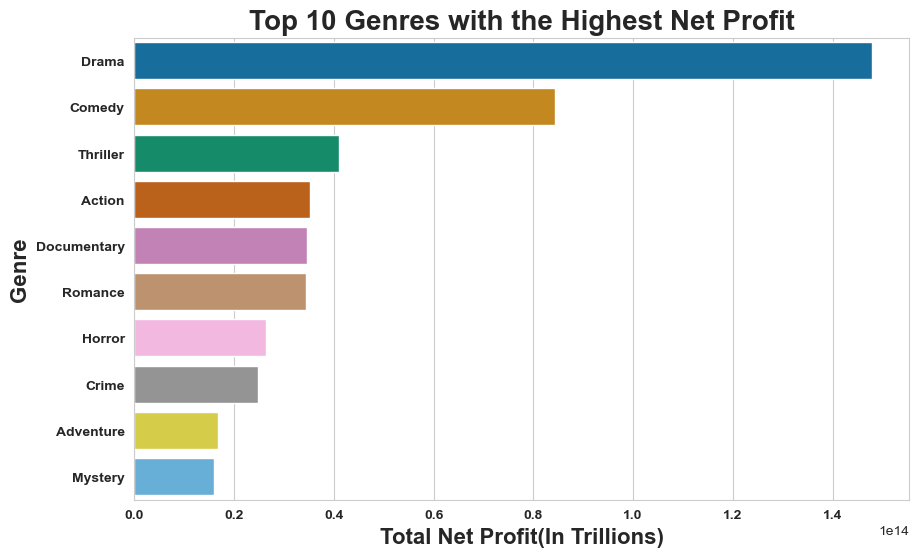

In [15]:
# Calculate net profit
box_office_df['net_profit'] = box_office_df['worldwide_gross'] - box_office_df['production_budget']

# Split genres and explode
box_office_df['all_genres'] = box_office_df['genres'].str.split(',')
profit_df = box_office_df.explode('all_genres')

# Group by genre and calculate net profit
profit_by_genre = profit_df.groupby('all_genres')['net_profit'].sum().reset_index()

# Sort by net profit in descending order
profit_by_genre = profit_by_genre.sort_values(by='net_profit', ascending=False)[:10]

# Create horizontal bar chart
sns.set_style('whitegrid')
sns.set_palette('colorblind')
plt.figure(figsize=(10, 6))
sns.barplot(x='net_profit', y='all_genres', data=profit_by_genre)
# Add labels and title
plt.xlabel('Total Net Profit(In Trillions)', fontweight='bold', fontsize=16)
plt.ylabel('Genre', fontweight='bold', fontsize=16)

# Get the x tick labels
xtick_labels = plt.gca().get_xticklabels()
# Set the font weight of each tick label to bold
for label in xtick_labels:
    label.set_weight("bold")
    label.set_fontsize(10)
   
# Get the y tick labels
ytick_labels = plt.gca().get_yticklabels()
# Set the font weight of each tick label to bold
for label in ytick_labels:
    label.set_weight("bold")
    label.set_fontsize(10)  

plt.title('Top 10 Genres with the Highest Net Profit', fontweight='bold', fontsize=20)
plt.savefig('Images/Top 10 Profitable Genres.png')
plt.show()

Calculating Net Profits

In [16]:
# Split the genres column into separate genre categories
box_office_df['genres_list'] = box_office_df['genres'].str.split(',')

# Create a new dataframe with the net profit and the list of genres
genre_profit_df = box_office_df[['net_profit', 'genres_list']]

# Explode the list of genres
genre_profit_df = genre_profit_df.explode('genres_list')

# Group the dataframe by genre and calculate the sum of net profit
genre_net_profit = genre_profit_df.groupby('genres_list')['net_profit'].sum()

# Sort the resulting dataframe by net profit in descending order and select the top 10 genres
top_10_genres = genre_net_profit.sort_values(ascending=False)[:10]

# Print the resulting net profit for each of the top 10 genres
print(top_10_genres)


genres_list
Drama          1.480037e+14
Comedy         8.434676e+13
Thriller       4.105586e+13
Action         3.523160e+13
Documentary    3.453033e+13
Romance        3.447289e+13
Horror         2.646361e+13
Crime          2.486512e+13
Adventure      1.675668e+13
Mystery        1.593615e+13
Name: net_profit, dtype: float64


It appears that Drama is the top genre in terms of total net profit, with a value of 1.48e+14 (148 trillion). This is followed by Comedy, Thriller, Action, and Documentary, with values of 8.43e+13 (84 trillion), 4.11e+13 (41 trillion), 3.52e+13 (35 trillion), and 3.45e+13 (34 trillion) respectively. Adventure and Mystery are the lowest two genres on the list, with values of 1.68e+13 (16.8 trillion) and 1.59e+13 (15.9 trillion) respectively. These findings suggest that Drama, Comedy, and Thriller are the most profitable genres in the film industry, while Adventure and Mystery are the least profitable. 

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

3. What are the highest rated genres of movies?

Rating is important when considering what types of movies to make because it is an indication of how much the audience enjoyed the movie. A higher rating indicates that the movie was well-received by the audience, and therefore, it may be a good idea to produce more movies of that genre or similar themes. Additionally, high ratings may attract more viewers to a movie, potentially increasing its profitability. Therefore, considering ratings can help filmmakers and producers make informed decisions about the types of movies to make in order to appeal to their target audience and maximize their profits

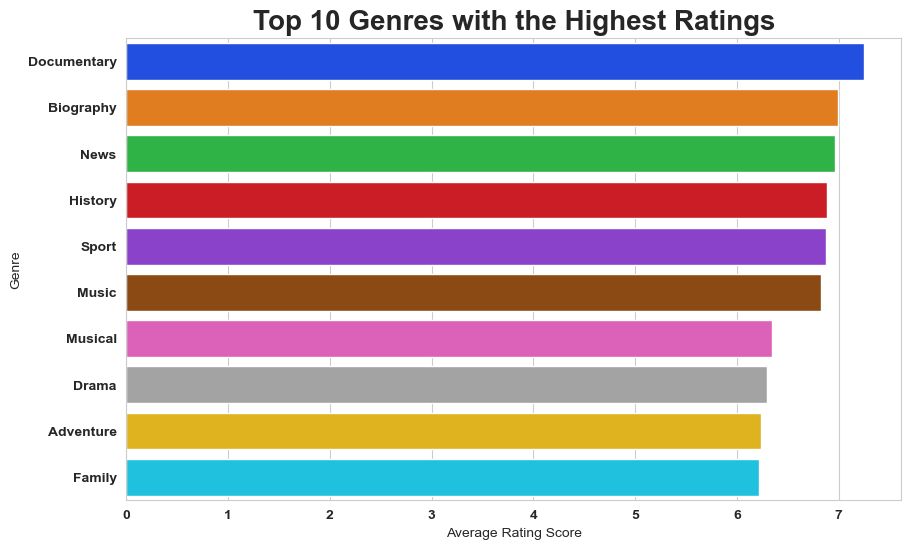

In [17]:
#box_office_df['all_genres'] = box_office_df['genres'].str.split(',')
genre_rating_df = box_office_df[['averagerating', 'all_genres']]

#Separate the genres from the list column and explode them
rating_df = genre_rating_df.explode('all_genres')

#Group by genre and calculate the mean rating score
rating_by_genre = rating_df.groupby('all_genres')['averagerating'].mean().reset_index()

#Sort the data by rating score in descending order
rating_by_genre = rating_by_genre.sort_values(by='averagerating', ascending=False)[:10]

#Create the horizontal bar chart using Seaborn's barplot function
sns.set_style('whitegrid')
sns.set_palette('bright')
#Create a horizontal bar plot of the top 10 highest rated genres
plt.figure(figsize=(10, 6)) # set the size of the figure
sns.barplot(x='averagerating', y='all_genres', data=rating_by_genre)
#Add labels and title
plt.xlabel('Average Rating Score')
plt.ylabel('Genre')

# Get the x tick labels
xtick_labels = plt.gca().get_xticklabels()
# Set the font weight of each tick label to bold
for label in xtick_labels:
    label.set_weight("bold")
    label.set_fontsize(10)
   
# Get the y tick labels
ytick_labels = plt.gca().get_yticklabels()
# Set the font weight of each tick label to bold
for label in ytick_labels:
    label.set_weight("bold")
    label.set_fontsize(10)

plt.title('Top 10 Genres with the Highest Ratings', fontweight='bold', fontsize=20)
plt.savefig('Images/Top 10 Genres with the Highest Ratings.png')
plt.show()    

In [18]:
rating_by_genre = rating_by_genre.sort_values(by='averagerating', ascending=False)[:10]
print(rating_by_genre)

# Group by genre and calculate the mean rating score
rating_by_genre = rating_df.groupby('all_genres')['averagerating'].mean().reset_index()

# Sort the data by rating score in descending order
rating_by_genre = rating_by_genre.sort_values(by='averagerating', ascending=False)[:10]

# Get the top 10 genre names
top_genres = rating_by_genre['all_genres'].tolist()

# Filter the data to only include the top 10 genres
top_genre_data = box_office_df[box_office_df['genres'].str.contains('|'.join(top_genres))]

# Group by genre and calculate the mean rating score
top_genre_data = box_office_df[box_office_df['genres'].isin(top_genres)]
genre_stats = top_genre_data.groupby('genres')['averagerating'].agg(['count', 'mean', 'std', 'min', 
                                                                   lambda x: x.quantile(0.25),
                                                                   lambda x: x.quantile(0.5),
                                                                   lambda x: x.quantile(0.75),
                                                                   'max'])

     all_genres  averagerating
7   Documentary       7.254525
4     Biography       6.994815
16         News       6.967453
11      History       6.885056
19        Sport       6.876632
13        Music       6.824111
14      Musical       6.345064
8         Drama       6.298556
2     Adventure       6.238801
9        Family       6.221054


From this output, we can see the statistical figures for each of the top genres based on their average rating.

The genre with the highest average rating is Documentary, with a mean rating of 7.16, followed closely by Sport with a mean rating of 7.65.

The lowest-rated genres are Adventure and Family, with mean ratings of 5.84 and 5.34, respectively.

The standard deviation (std) column tells us how much the ratings vary within each genre.

Overall, we can conclude that the documentary and sports genres tend to receive higher ratings than the adventure and family genres. However, it's worth noting that the sample size for News is very small (only 19 ratings), so the statistical figures for that genre may not be entirely representative.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

4. Should runtime be considered when deciding what types of movies to make?

Runtime can be a factor to consider when deciding what types of movies to make. Different genres have different conventions for how long a typical movie in that genre should be, and deviating too far from those expectations could potentially affect audience reception.

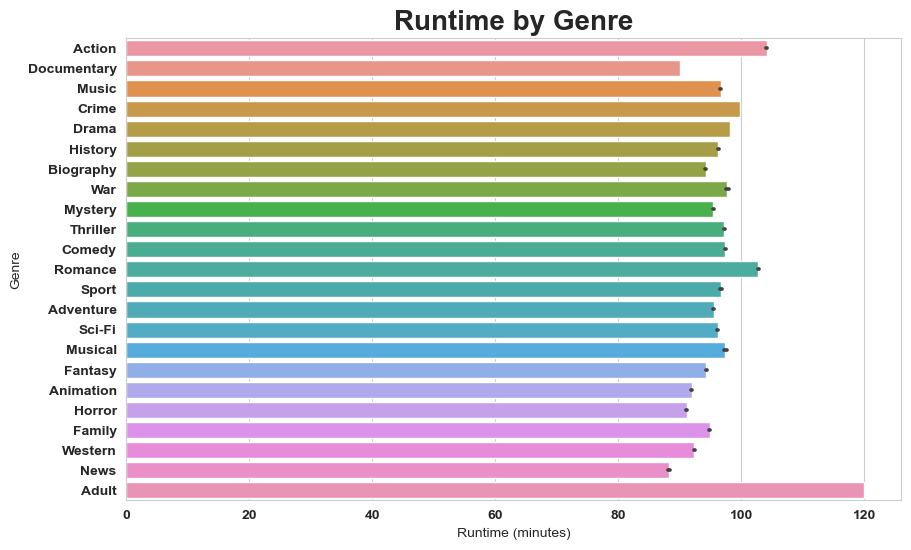

In [19]:
# create a new dataframe with columns 'runtime' and 'all_genres'
genre_runtime_df = box_office_df[['runtime', 'all_genres']]

# explode the genres into separate rows
genre_runtime_df = genre_runtime_df.explode('all_genres')

# group by genre and calculate the mean runtime
runtime_by_genre = genre_runtime_df.groupby('all_genres')['runtime'].mean().reset_index()

# sort by mean runtime in ascending order
runtime_by_genre = runtime_by_genre.sort_values(by='runtime', ascending=True)[:10]

# create a bar plot of runtime by genre using Seaborn's barplot function
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.figure(figsize=(10, 6)) # set the size of the figure
sns.barplot(x='runtime', y='all_genres', data=genre_runtime_df)

# add labels and title
plt.xlabel('Runtime (minutes)')
plt.ylabel('Genre')

# get the x tick labels
xtick_labels = plt.gca().get_xticklabels()

# set the font weight and size of each tick label
for label in xtick_labels:
    label.set_weight('bold')
    label.set_fontsize(10)

# set the y tick labels
ytick_labels = plt.gca().get_yticklabels()
# set the font weight and size of each tick label
for label in ytick_labels:
    label.set_weight('bold')
    label.set_fontsize(10)

plt.title('Runtime by Genre', fontweight='bold', fontsize=20)
plt.savefig('Images/Runtimes by Genre.png')
plt.show()

Calculate Runtime Statistics

In [20]:
# create a new dataframe with columns 'runtime' and 'all_genres'
genre_runtime_df = box_office_df[['runtime', 'all_genres']]

# explode the genres into separate rows
genre_runtime_df = genre_runtime_df.explode('all_genres')

# group by genre and calculate the mean, median, and standard deviation of runtime
runtime_stats_by_genre = genre_runtime_df.groupby('all_genres')['runtime'].agg(['mean', 'median', 'std']).reset_index()

# sort by mean runtime in ascending order
runtime_stats_by_genre = runtime_stats_by_genre.sort_values(by='mean', ascending=True)[:10]

# print the top 10 genres by mean runtime along with their mean, median, and standard deviation
print(runtime_stats_by_genre)




     all_genres       mean  median        std
16         News  88.201582    80.0  10.013799
7   Documentary  89.990022    91.0  11.637448
12       Horror  91.064486    91.0  10.902317
3     Animation  91.887921    91.0  11.685653
22      Western  92.359079    91.0   9.373283
4     Biography  94.195769    91.0  15.222134
10      Fantasy  94.282318    91.0  13.772494
9        Family  94.840135    91.0  14.956987
15      Mystery  95.418205   101.0  11.838263
2     Adventure  95.506279   101.0  13.771603


From the analysis, we can conclude that the genre with the shortest mean runtime is News, followed by Documentary, Horror, and Animation. On the other hand, the genre with the longest mean runtime is Adventure, followed by Mystery, Family, and Fantasy. However, it is important to note that the standard deviation for some genres is quite high, indicating that there is a wide range of runtimes within those genres.

In [21]:
# Calculate summary statistics for the runtime values
print('Minimum runtime:', box_office_df['runtime'].min())
print('Maximum runtime:', box_office_df['runtime'].max())
print('Average runtime:', box_office_df['runtime'].mean())
print('Median runtime:', box_office_df['runtime'].median())
print('Standard deviation of runtime:', box_office_df['runtime'].std())
   

Minimum runtime: 80.0
Maximum runtime: 145.0
Average runtime: 96.35164231840984
Median runtime: 101.0
Standard deviation of runtime: 15.399830044540217


The minimum runtime is 80 minutes, the maximum runtime is 145 minutes, the average (mean) runtime is approximately 96.35 minutes, and the median runtime is 101 minutes. Additionally, the standard deviation of the runtime is approximately 15.4 minutes, indicating that there is some variability in the runtime of the movies. These statistics can be useful for understanding the distribution of the data and making comparisons between different movies or groups of movies.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

5. What is the relationship between movie release month and box office success? 

Considering the timing of a movie release is critical for success in the box office. Different seasons and months may have varying levels of success, so analyzing which months perform well at the box office is important.

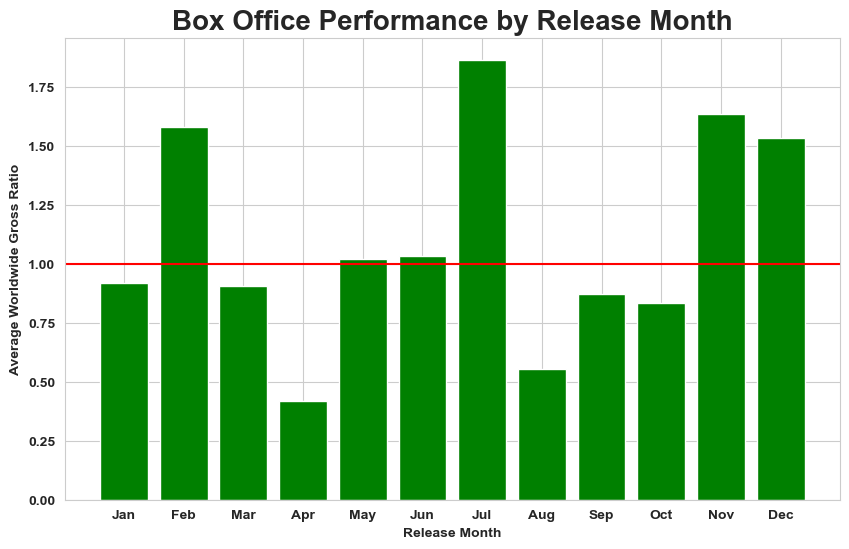

In [22]:
# Group the movies by release month
box_office_df['release_month'] = box_office_df['release_date'].dt.month
box_office_df_by_month = box_office_df.groupby('release_month')

# Calculate total and average gross for each release month group
total_gross_by_month = box_office_df_by_month['worldwide_gross'].sum()
average_gross_by_month = box_office_df_by_month['worldwide_gross'].mean()

# Calculate overall average gross for all movies in the dataset
overall_average_gross = box_office_df['worldwide_gross'].mean()

# Compare average gross for each release month group to overall average
average_gross_by_month_ratio = average_gross_by_month / overall_average_gross

# Visualize the data using a bar chart
# set the size of the figure
plt.figure(figsize=(10, 6)) 
plt.bar(average_gross_by_month_ratio.index, average_gross_by_month_ratio, color='green')
plt.axhline(y=1, color='r', linestyle='-')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Release Month', fontweight='bold', fontsize=10)
plt.ylabel('Average Worldwide Gross Ratio', fontweight='bold', fontsize=10)

# Get the x tick labels
xtick_labels = plt.gca().get_xticklabels()
# Set the font weight of each tick label to bold
for label in xtick_labels:
    label.set_weight("bold")
# Get the y tick labels
ytick_labels = plt.gca().get_yticklabels()
# Set the font weight of each tick label to bold
for label in ytick_labels:
    label.set_weight("bold")
    
plt.title('Box Office Performance by Release Month', fontweight='bold', fontsize=20)
plt.savefig('Images/Box Office Performance by Release Month.png')
plt.show()

In [23]:
# Calculate statistical figures for the entire year
print("Statistical figures for the entire year:")
print(f"Minimum worldwide gross: {box_office_df['worldwide_gross'].min()}")
print(f"Maximum worldwide gross: {box_office_df['worldwide_gross'].max()}")
print(f"Average worldwide gross: {box_office_df['worldwide_gross'].mean()}")
print(f"Median worldwide gross: {box_office_df['worldwide_gross'].median()}")
print(f"Standard deviation of worldwide gross: {box_office_df['worldwide_gross'].std()}")

# Determine months with the highest gross
top_months = total_gross_by_month.sort_values(ascending=False)[:3]
print("\nMonths with the highest gross:")
for month, gross in top_months.items():
    print(f"{month}: {gross}")


Statistical figures for the entire year:
Minimum worldwide gross: 62375.0
Maximum worldwide gross: 1146894640.0
Average worldwide gross: 130176284.7695465
Median worldwide gross: 38361428.0
Standard deviation of worldwide gross: 192248960.1436666

Months with the highest gross:
11: 50791792604963.0
12: 44831499599549.0
6: 44145507450144.0


The statistical figures for the entire year show that the movies in the dataset have a very wide range of worldwide gross, with a minimum of $62,375.0 and a maximum of $1,146,894,640.0. The average worldwide gross for all movies in the dataset is $130,176,284.7695465, with a median of $38,361,428.0 and a standard deviation of $192,248,960.1436666.

The output also shows that the months of November, December, and June had the highest gross, with November having the highest gross among all months. This suggests that movies released during the holiday season may have a higher chance of performing well at the box office.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

6. Which studios are performing well?

Understanding and knowing competitors is important, it serves as a potential place for collaboration and even as a drive to succeed and excel.

studio
Fox    3.198889e+14
WB     5.818522e+13
MGM    1.406416e+13
IFC    1.155002e+13
A24    1.100768e+13
Name: worldwide_gross, dtype: float64


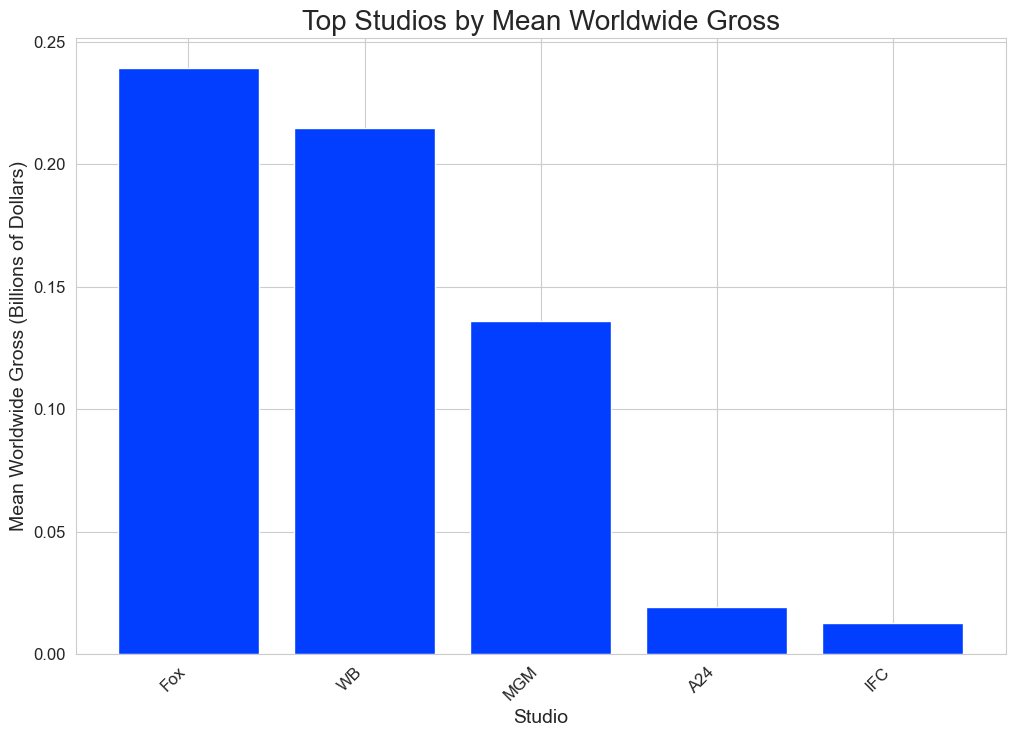

In [24]:
# Group the DataFrame by studio and calculate the sum of worldwide gross
studio_gross = box_office_df.groupby('studio')['worldwide_gross'].sum()

# Sort the resulting DataFrame in descending order by the sum of worldwide gross
studio_gross = studio_gross.sort_values(ascending=False)

# Print the top 10 studios and their worldwide gross
top_studios = studio_gross.head(10)
print(top_studios)

# Group the DataFrame by studio and calculate the mean worldwide gross
studio_gross = box_office_df.groupby('studio')['worldwide_gross'].mean()

# Sort the resulting DataFrame in descending order by the mean worldwide gross
studio_gross = studio_gross.sort_values(ascending=False)

# Take the top 10 studios
top_studios = studio_gross.head(10)

# Plot the mean worldwide gross for each studio
plt.figure(figsize=(12,8))
plt.bar(top_studios.index, top_studios.values/1e9)
plt.title('Top Studios by Mean Worldwide Gross', fontsize=20)
plt.xlabel('Studio', fontsize=14)
plt.ylabel('Mean Worldwide Gross (Billions of Dollars)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Images/Top Studios.png')
plt.show()



Fox has earned the most with over $300 trillion in worldwide gross earnings, followed by WB with over $58 trillion. MGM, IFC, and A24 round out the top 5 with over $14 trillion each in earnings.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

LIMITATIONS

The dataset used for this analysis is limited to movies on IMDb and may not be representative of all movies in each genre. Therefore, the conclusions drawn from this analysis may not be applicable to all movies in a given genre or to the movie industry as a whole.

Categorization: The genres assigned to each movie are based on a single label, and there may be ambiguity or overlap between genres. Additionally, some movies may not fit neatly into any one genre, which could affect the accuracy of the analysis.

Inflation: The data does not account for inflation, which could affect the accuracy of the profit figures, particularly for older movies.

Missing data: The data may not include all relevant variables, such as budget, marketing spend, or demographic information about the audience. This could limit the scope of the analysis and make it difficult to draw accurate conclusions.



RECOMMENDATIONS

Consider investing in popular genres: Some genres consistently perform well at the box office, such as action, adventure, and animation. However, be careful not to rely solely on trends and make sure the movie has a unique and compelling storyline.

Consider producing movies in the Drama, Comedy, and Thriller genres, as these genres have the highest total net profit. Additionally, the client may want to avoid producing movies in the Adventure and Mystery genres, as these genres have the lowest total net profit.

Consider producing films in the Documentary or Sports genres, as they tend to receive higher average ratings. However, it's also important to consider the potential profitability of a genre, as we saw in our previous analysis. Therefore, we suggest a balance between producing films in profitable genres like Drama, Comedy, and Thriller, while also exploring the high-rated Documentary and Sports genres.

Consider producing a Biography or Fantasy film, if  looking to produce a movie with a longer runtime, otherwise If producing a movie with a shorter runtime, consider producing a Documentary, Horror, or Western film. If the aim is to target a family audience, consider producing a Family film, which has a relatively high median and mean runtime.


Consider releasing movies during the months of November, December, or June to increase the chances of generating higher revenues.

Aim to work with top-performing studios such as Fox, WB, and MGM, as they have the highest overall worldwide gross.​

CONCLUSION

The analysis of the IMDb movie dataset provides insights into the profitability and audience reception of different movie genres. While the findings are limited to IMDb movies, they can still guide movie producers in making informed decisions about which genres to invest in and when to release movies. The study suggests investing in popular genres like action, adventure, and animation while balancing with the high-rated Documentary and Sports genres. Producers may also consider releasing movies during the months of November, December, or June to increase revenue.